
<center>
<img src="https://cdn-scripbox-wordpress.scripbox.com/wp-content/uploads/2021/09/us-stock-market-timings-vector.png" width=700>
</center>

<p>
In this tutorial we would be trying to predict if the stock price of Google will increase or decrease based on the historical idea. We would be using something known as backtesting and hyperparameter tuning to increase the precision score of our XGBoost Classifier.

 Google was founded on September 4, 1998, by <b>Larry Page</b> and <b>Sergey Brin</b> while they were PhD students at Stanford University in California. Together they own about 14% of its publicly listed shares and control 56% of the stockholder voting power through super-voting stock. The company went public via an initial public offering (IPO) in 2004. In 2015, Google was reorganized as a wholly owned subsidiary of Alphabet Inc. 
    
<center>
<img src="https://1000logos.net/wp-content/uploads/2021/05/Google-logo.png" width=700>
</center>

Google is Alphabet's largest subsidiary and is a holding company for Alphabet's Internet properties and interests. Sundar Pichai was appointed CEO of Google on October 24, 2015, replacing Larry Page, who became the CEO of Alphabet. On December 3, 2019, Mr. Pichai also became the CEO of Alphabet.</p>

<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color: royalblue;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:white;">Importing Libraries
    
</h2>
</div>
    
</center>

In [1]:
!pip install yfinance --quiet

In [2]:
import warnings
warnings.filterwarnings("ignore")
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.size'] = 14
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (22,5)
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import GridSearchCV

<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color: royalblue;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:white;">Reading the data from yfinance library
    
</h2>
</div>
    
</center>

Yahoo Finance uses `pandas` library and automatically puts the entire data into a nice looking dataframe. We are using the `max` period to fetch all of the data of **Google** Stock prices.

In [3]:
data = yf.Ticker("GOOGL")
data_hist = data.history(period="max")
data_hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2004-08-19 00:00:00-04:00,2.502503,2.604104,2.401401,2.511011,893181924,0,0.0
2004-08-20 00:00:00-04:00,2.527778,2.729730,2.515015,2.710460,456686856,0,0.0
2004-08-23 00:00:00-04:00,2.771522,2.839840,2.728979,2.737738,365122512,0,0.0
2004-08-24 00:00:00-04:00,2.783784,2.792793,2.591842,2.624374,304946748,0,0.0
2004-08-25 00:00:00-04:00,2.626627,2.702703,2.599600,2.652653,183772044,0,0.0
...,...,...,...,...,...,...,...
2022-11-16 00:00:00-05:00,97.900002,99.639999,97.639999,98.849998,29105200,0,0.0
2022-11-17 00:00:00-05:00,96.970001,99.279999,96.790001,98.360001,26052600,0,0.0
2022-11-18 00:00:00-05:00,98.769997,98.900002,96.370003,97.430000,28328800,0,0.0


In [4]:
color=['C0', 'orange','green', 'mediumpurple', 'brown']

The below chart shows us how the prices have fluctuated over the months, years, and trading days.

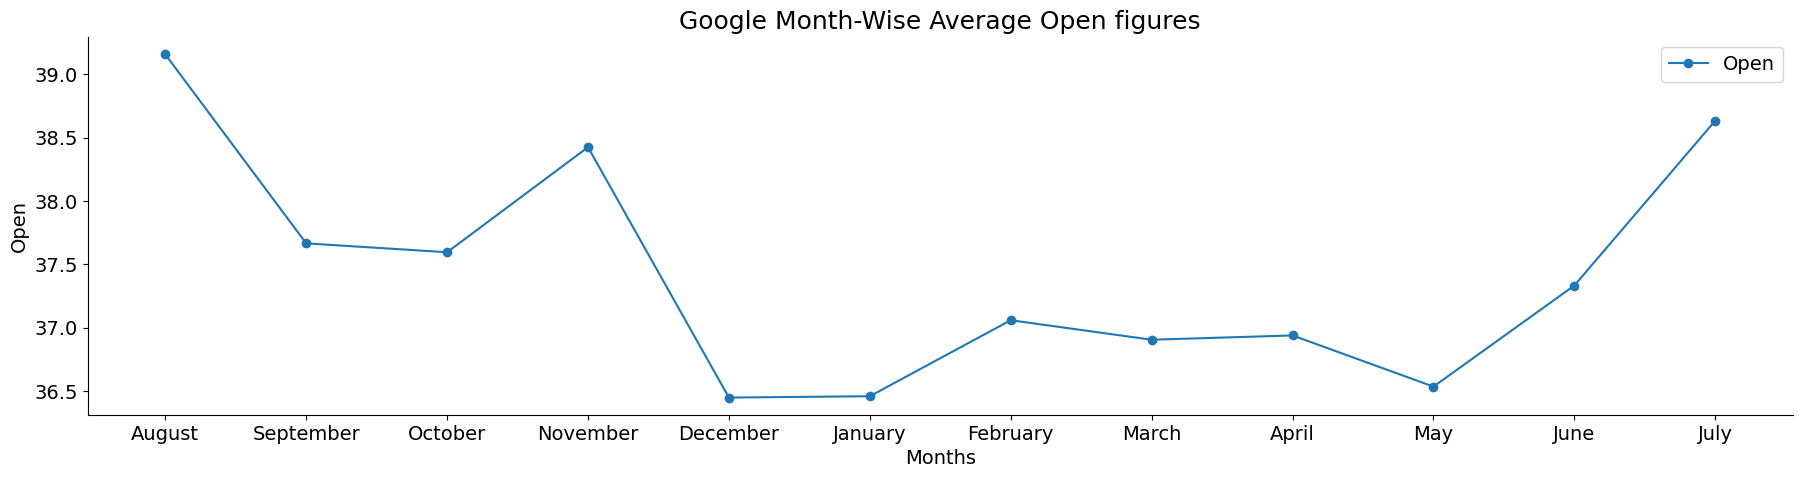

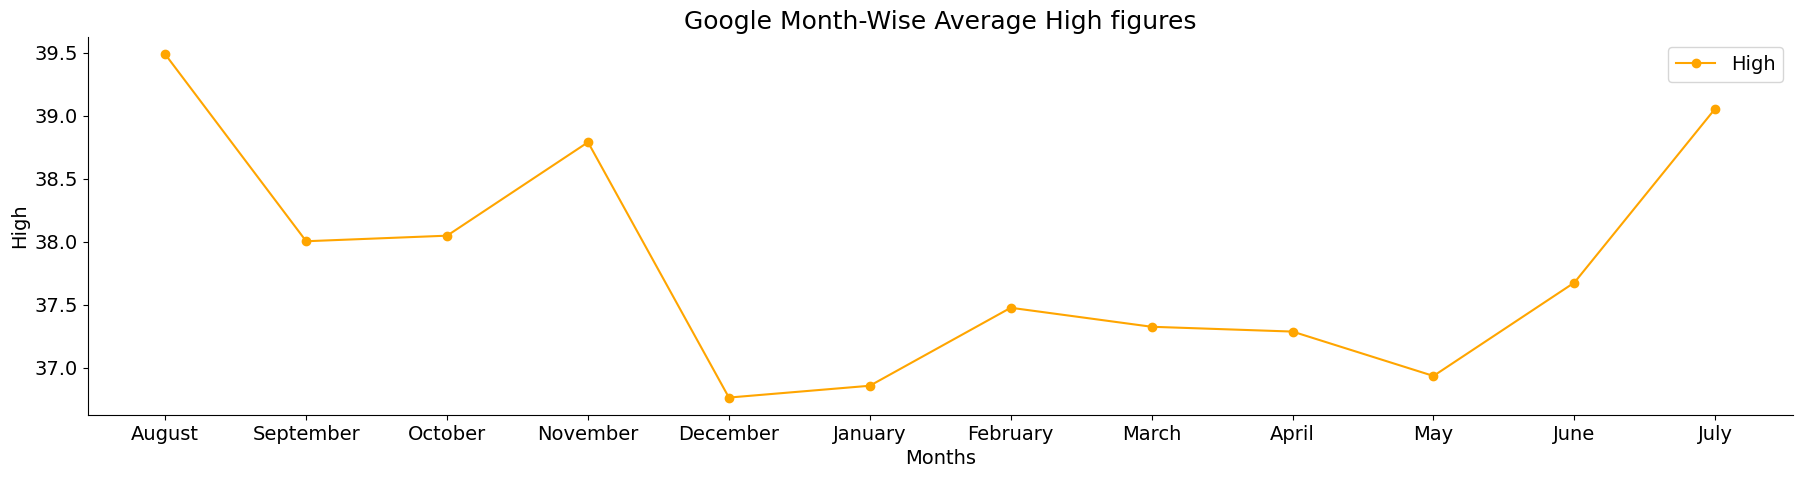

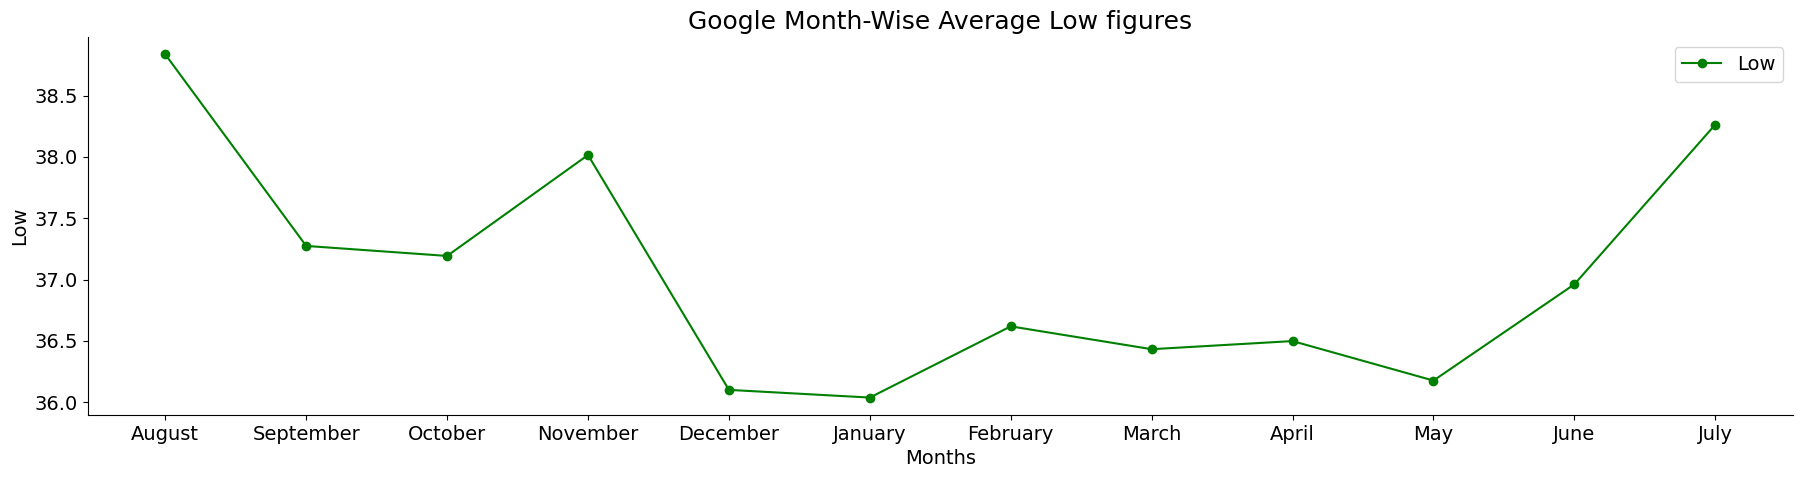

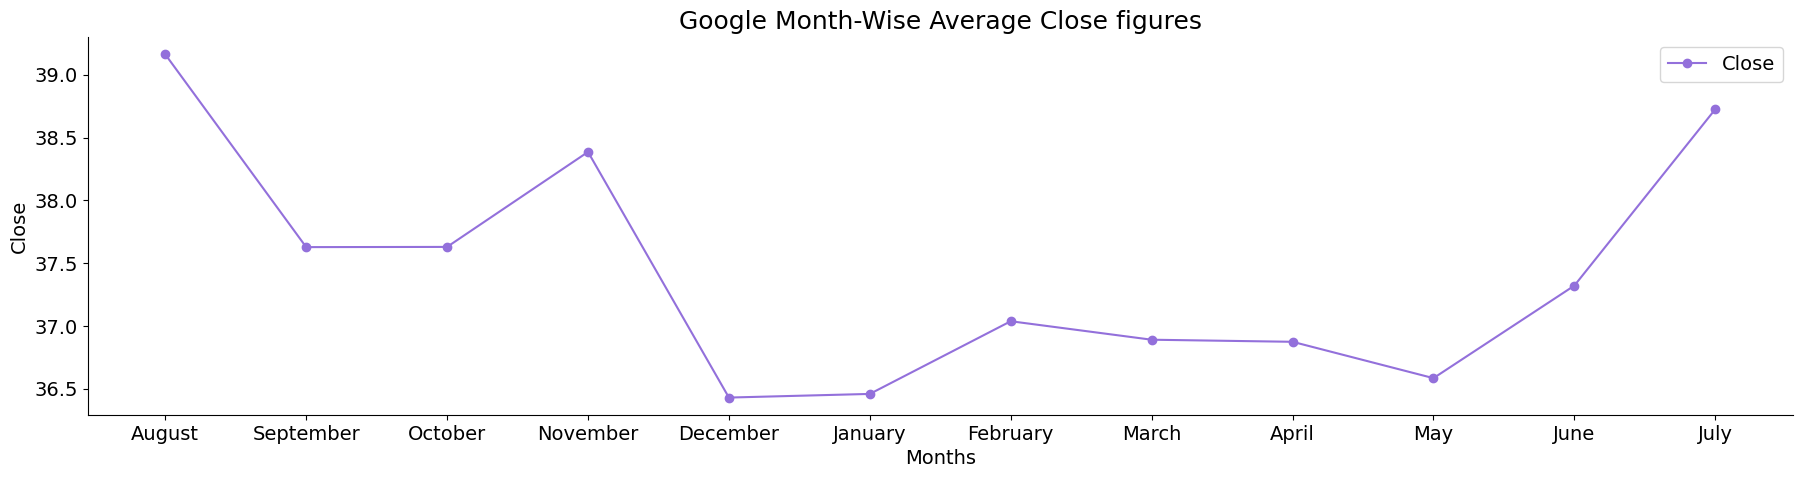

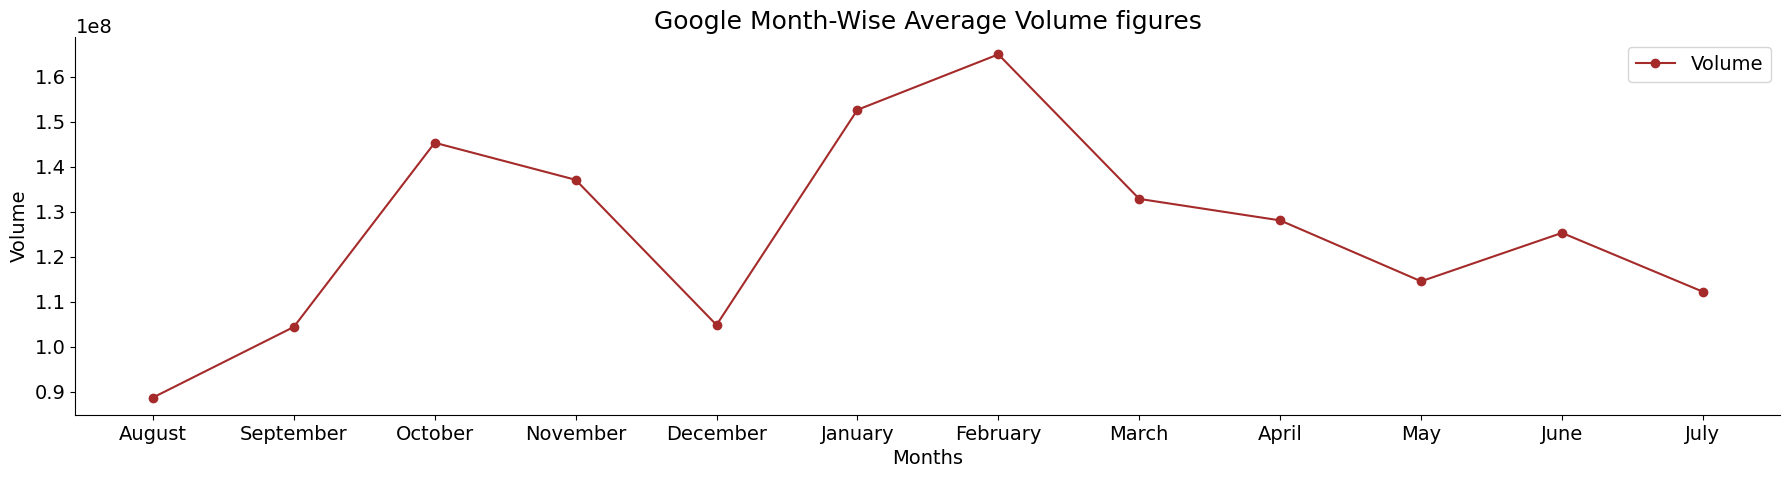

In [5]:
for i in range(len(data_hist.groupby(data_hist.index.month_name(), sort=False).mean().columns[:-2])):
    plt.plot(data_hist.groupby(data_hist.index.month_name(), sort=False).mean().iloc[:, i], color= color[i], marker='o')
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.title(f"Google Month-Wise Average {data_hist.groupby(data_hist.index.month_name(), sort=False).mean().iloc[:, i].name} figures", fontsize=18)
    plt.xlabel('Months')
    plt.ylabel(data_hist.groupby(data_hist.index.month_name(), sort=False).mean().iloc[:, i].name)
    plt.legend([data_hist.groupby(data_hist.index.month_name(), sort=False).mean().iloc[:, i].name])
    plt.show()

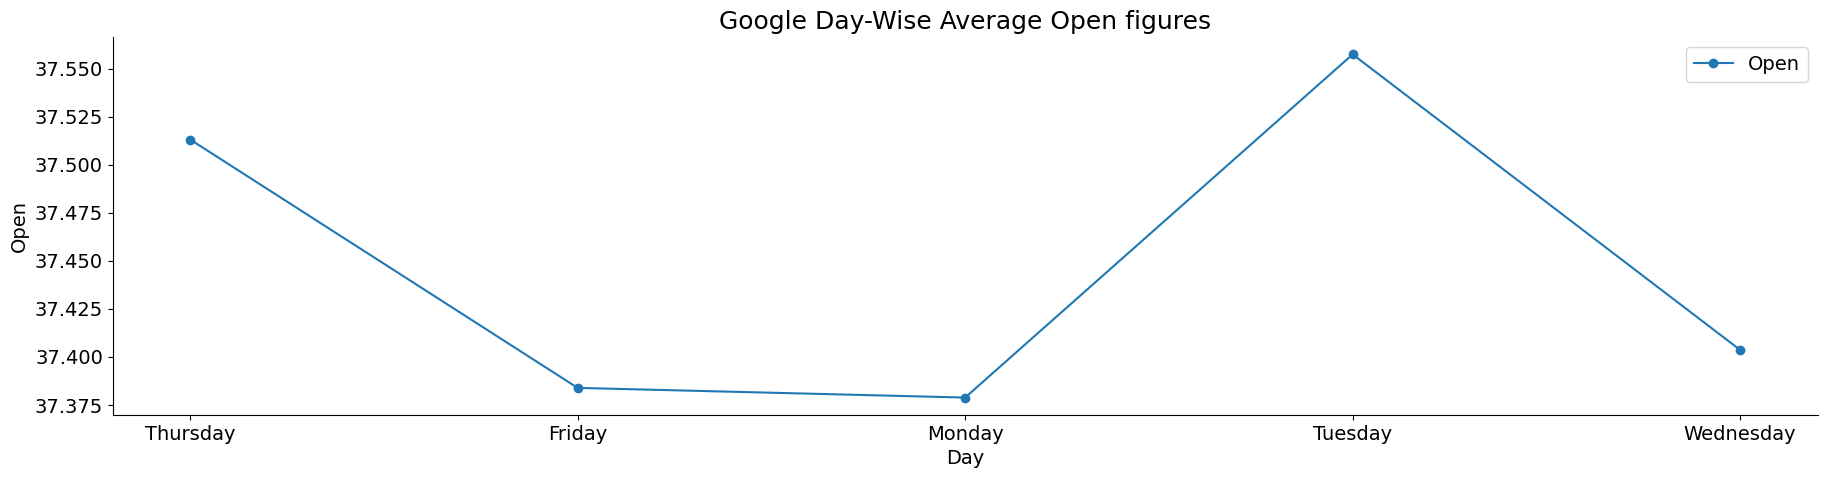

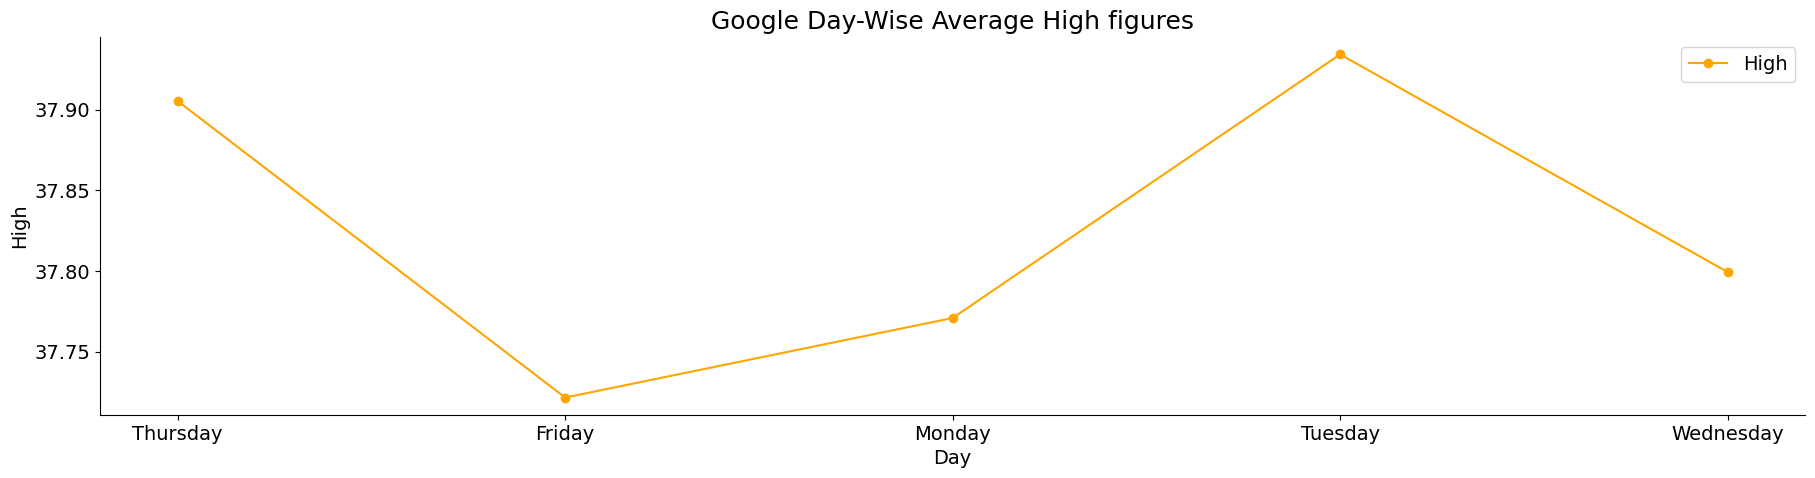

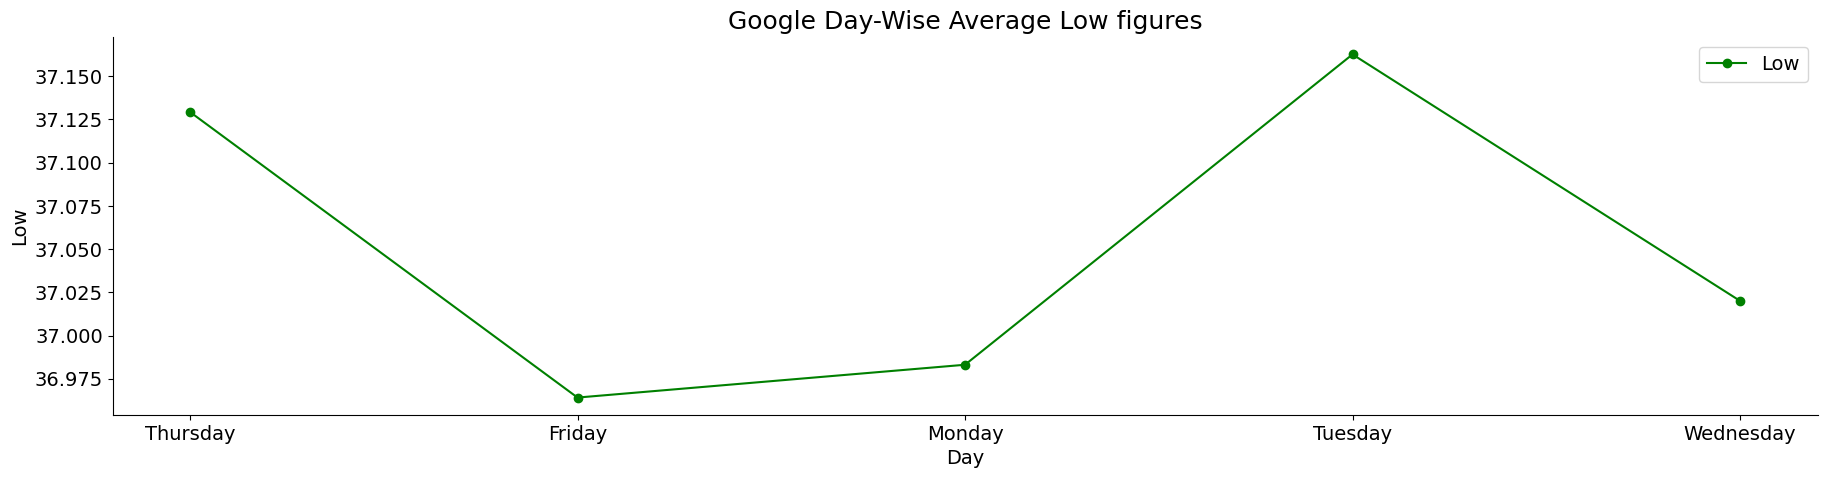

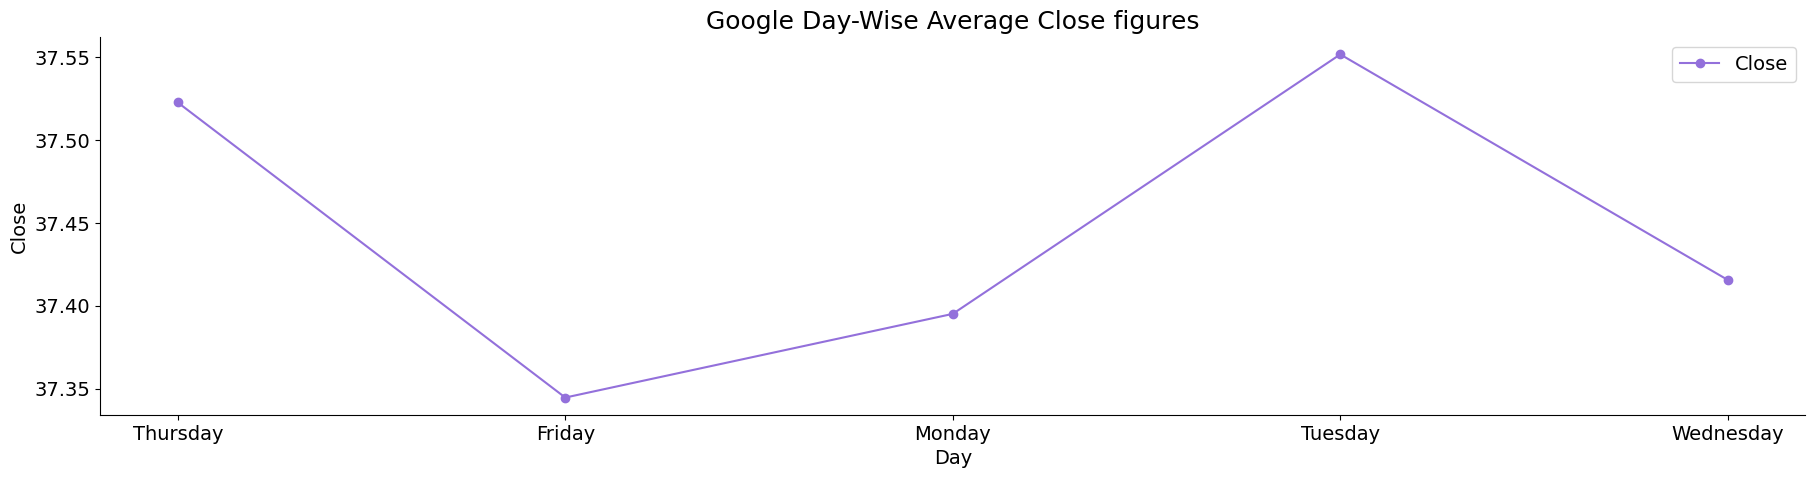

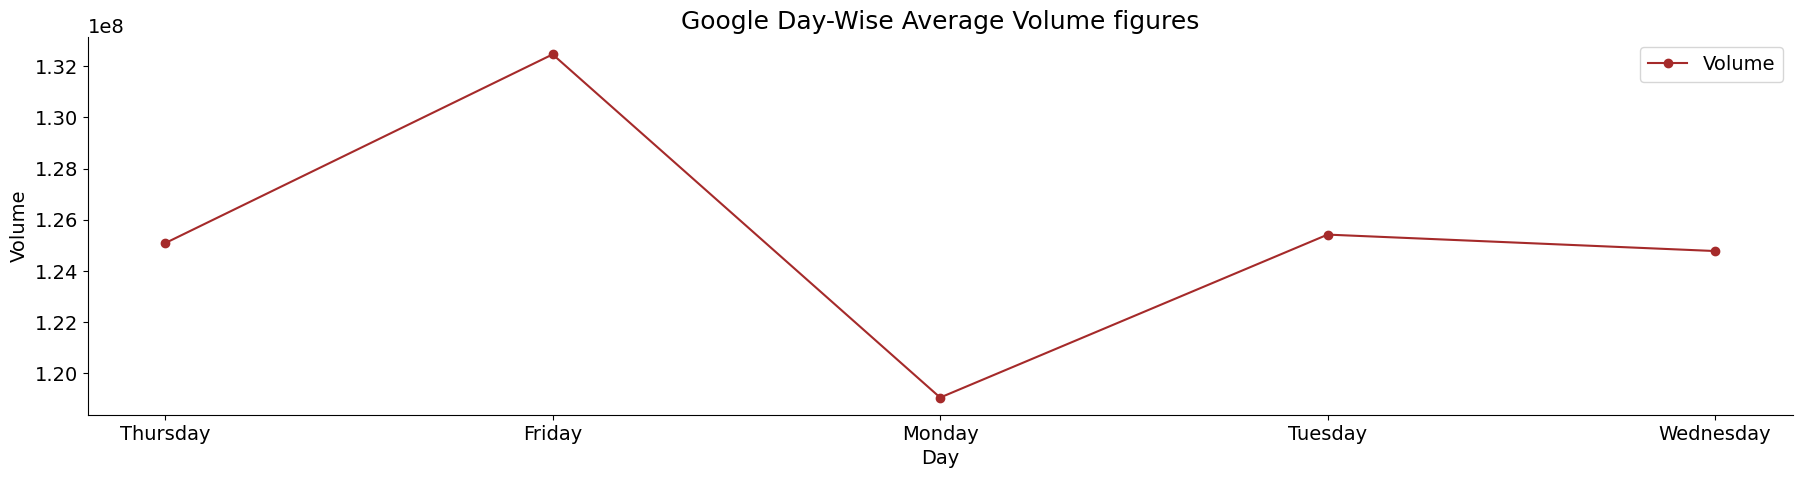

In [6]:
for i in range(len(data_hist.groupby(data_hist.index.day_name(), sort=False).mean().columns[:-2])):
    plt.plot(data_hist.groupby(data_hist.index.day_name(), sort=False).mean().iloc[:, i], color= color[i], marker='o')
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.title(f"Google Day-Wise Average {data_hist.groupby(data_hist.index.day_name(), sort=False).mean().iloc[:, i].name} figures", 
              fontsize=18)
    plt.xlabel('Day')
    plt.ylabel(data_hist.groupby(data_hist.index.day_name(), sort=False).mean().iloc[:, i].name)
    plt.legend([data_hist.groupby(data_hist.index.day_name(), sort=False).mean().iloc[:, i].name])
    plt.show()

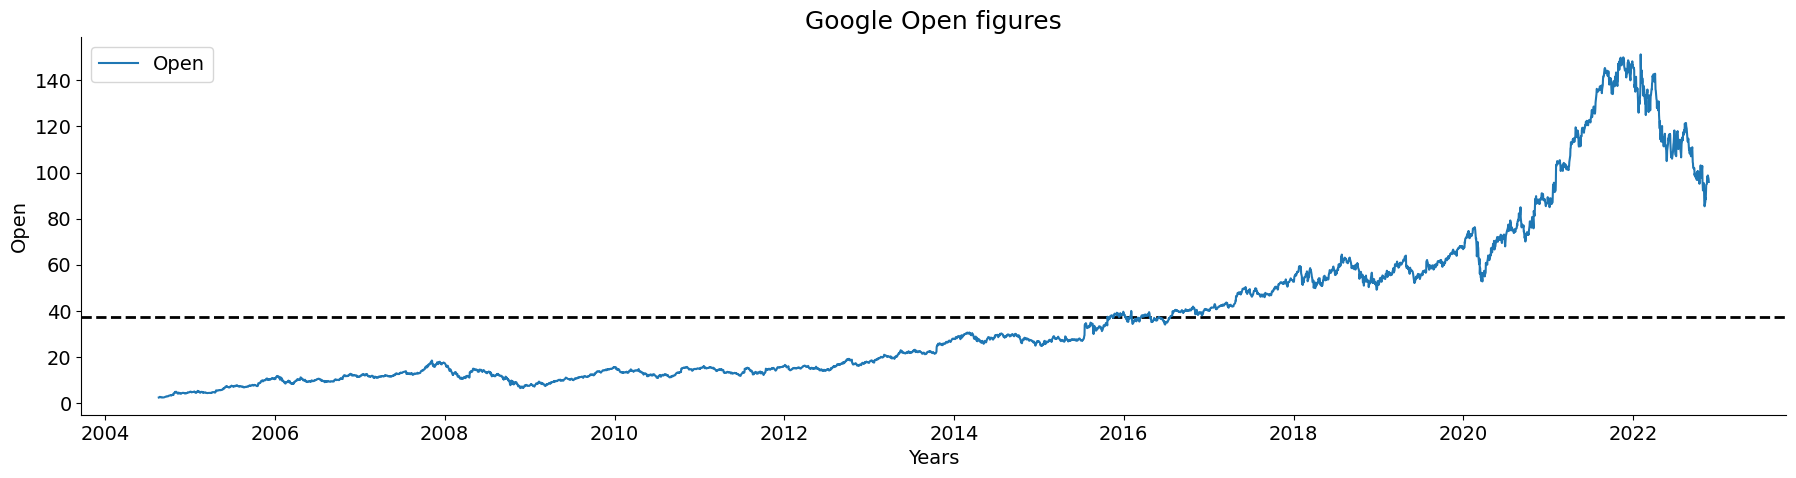

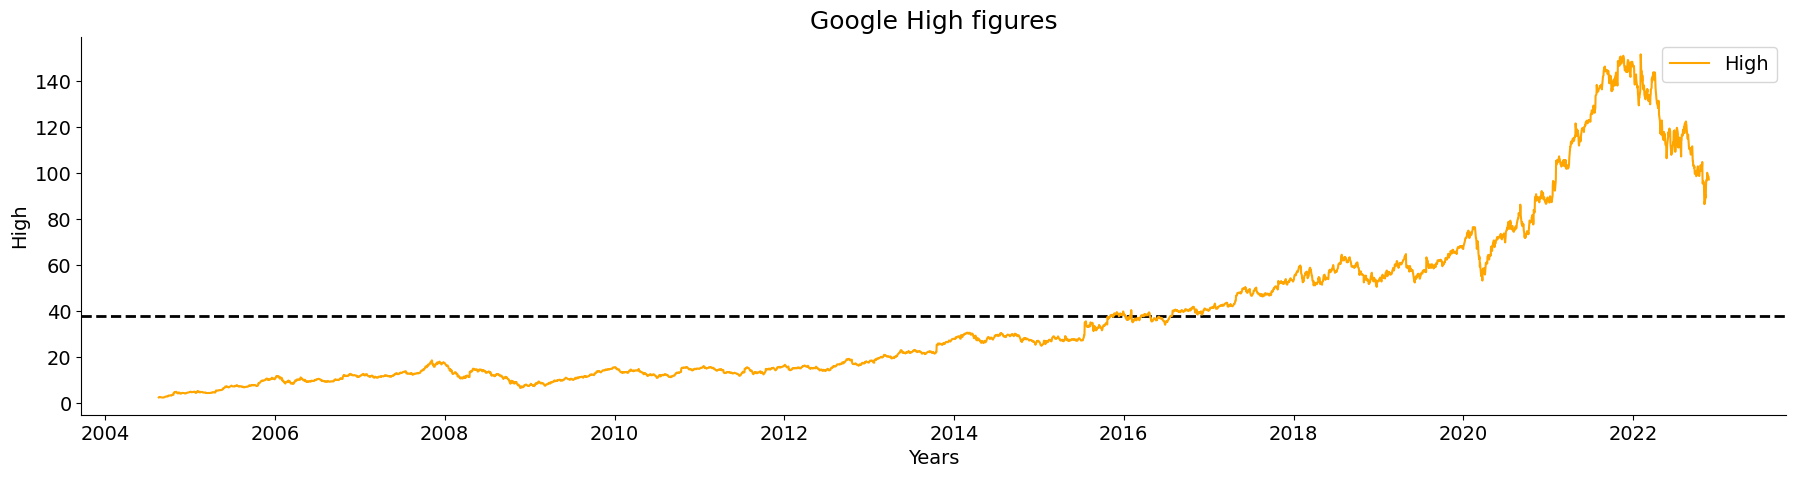

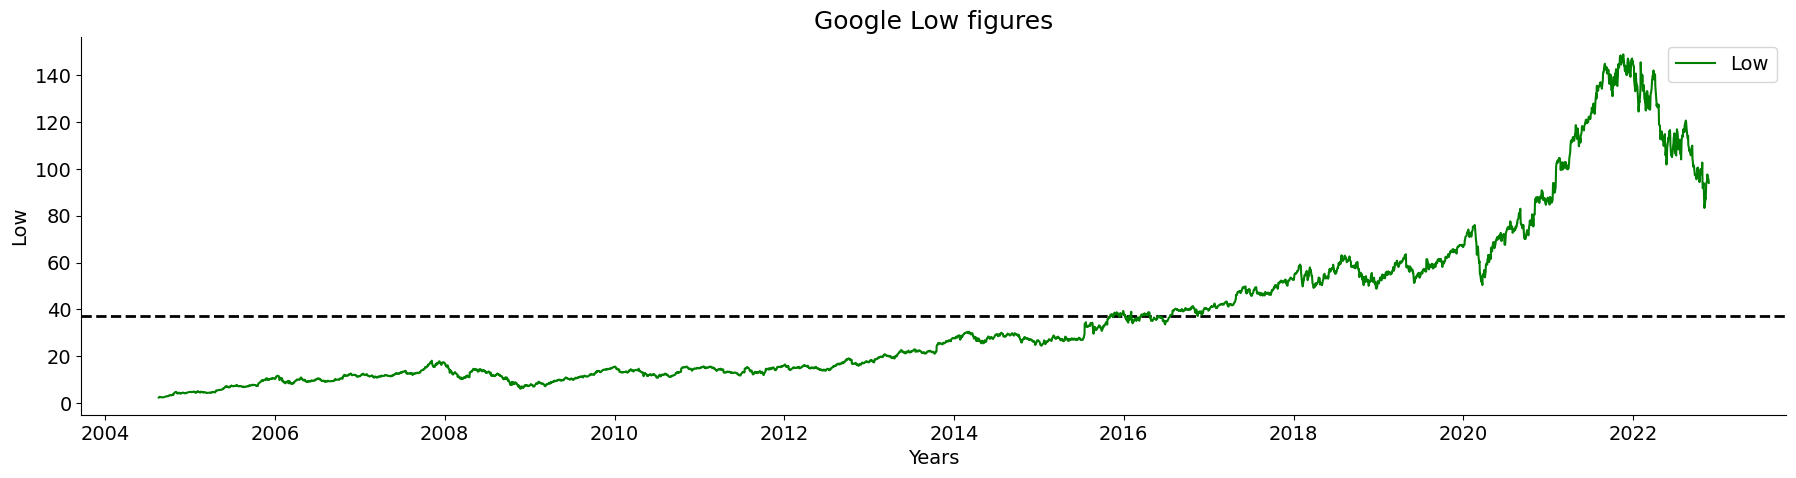

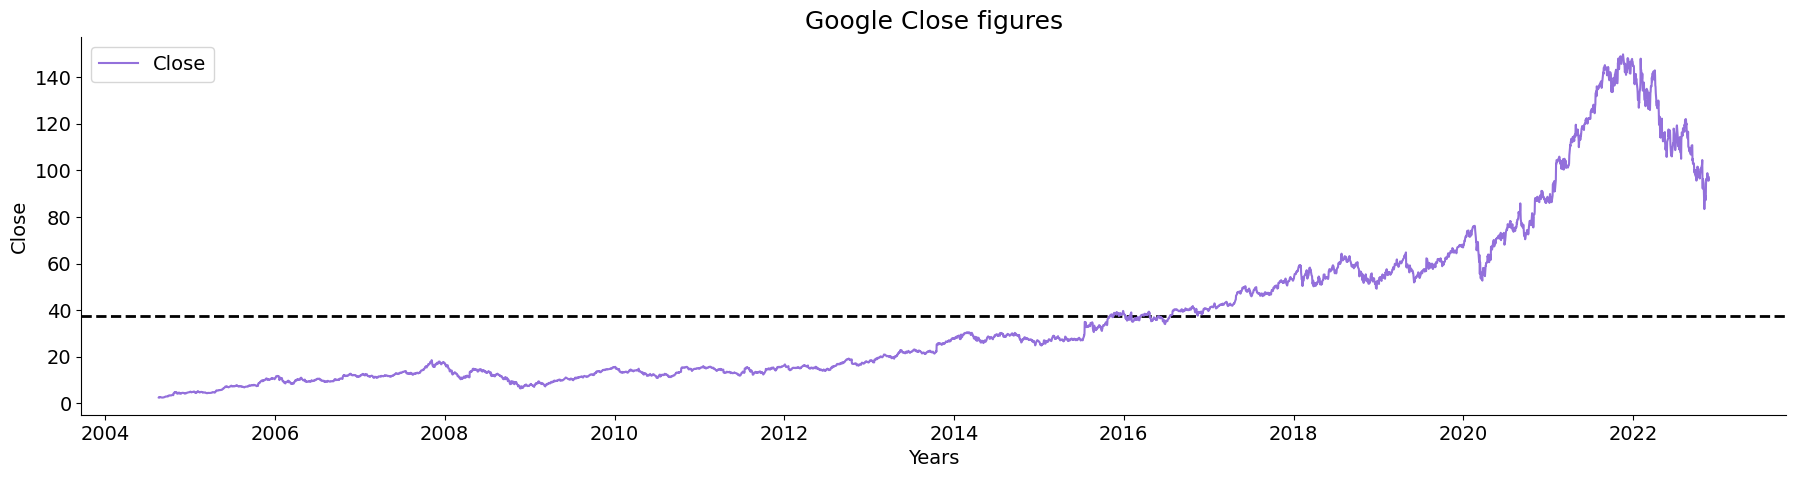

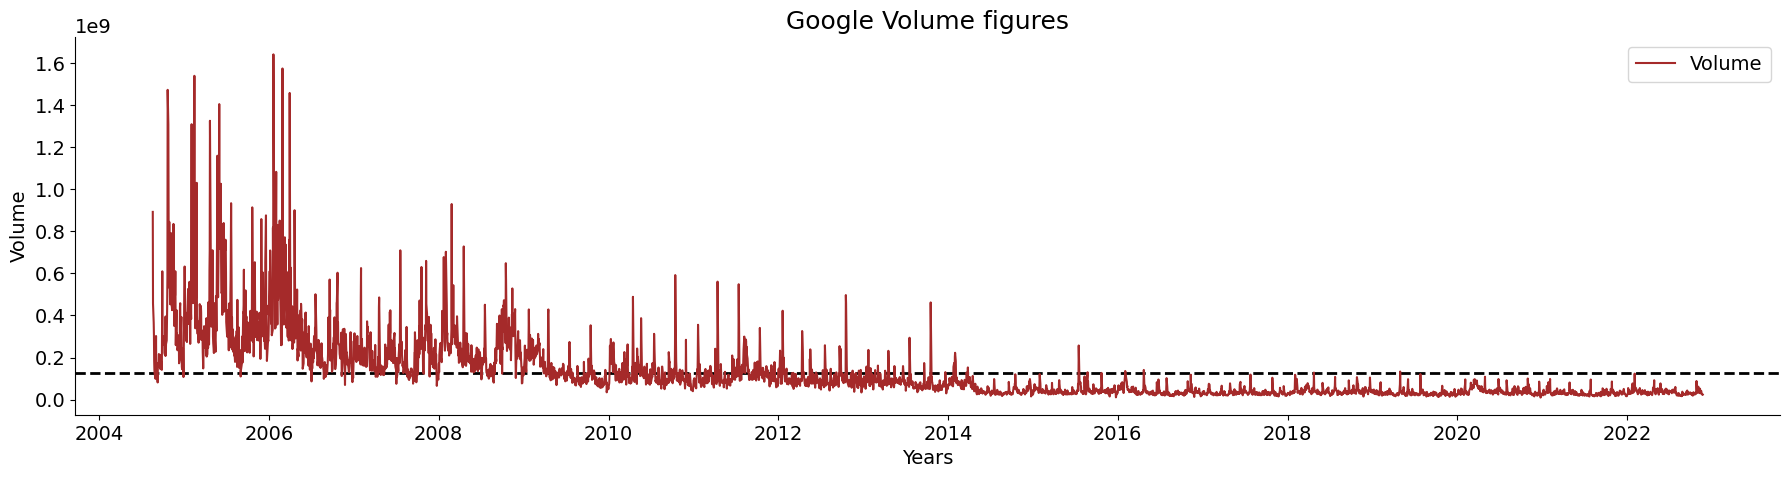

In [7]:
for i in range(len(data_hist.columns[:-2])):
    plt.plot(data_hist[data_hist.columns[i]], color = color[i])
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.axhline(data_hist[data_hist.columns[i]].mean(), linestyle='--', lw=2, zorder=1, color='black')
    plt.title("Google "+data_hist.columns[i] + " figures", fontsize=18)
    plt.xlabel('Years')
    plt.ylabel(data_hist.columns[i])
    plt.legend([data_hist.columns[i]])
    plt.show()

<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color: royalblue;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:white;">Adding Target Values
    
</h2>
</div>
    
</center>

We are adding the target column where the column will say 0 or 1. 0 meaning the price went down and 1 would mean the price went up.

Rolling method will look at the number of rows in the data (in our case 2) and then what we are saying is return 1st row if the 2nd row is higher else return 0 and this gives us our target.

In [8]:
data_hist.rolling(2).apply(lambda x: x.iloc[1] > x.iloc[0])["Close"]

Date
2004-08-19 00:00:00-04:00    NaN
2004-08-20 00:00:00-04:00    1.0
2004-08-23 00:00:00-04:00    1.0
2004-08-24 00:00:00-04:00    0.0
2004-08-25 00:00:00-04:00    1.0
                            ... 
2022-11-16 00:00:00-05:00    1.0
2022-11-17 00:00:00-05:00    0.0
2022-11-18 00:00:00-05:00    0.0
2022-11-21 00:00:00-05:00    0.0
2022-11-22 00:00:00-05:00    1.0
Name: Close, Length: 4599, dtype: float64

In [9]:
data_hist["Target"] = data_hist.rolling(2).apply(lambda x: x.iloc[1] > x.iloc[0])["Close"]

Now that we have our target, <i >we would shift our data by 1 row</i>. 

What that means is data of 19-08-2004 will shift to the next available data which is 20-08-2004. This means we would, in real scenario, be using yesterday's data to predict tomorrow. However if we were not to do that what we would be doing is using today's data to predict today's target which is something that is likely to render terrible results in real life situations.

In [10]:
df = data_hist.copy()
df = df.shift(1)
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Target
Date,,,,,,,,
2004-08-19 00:00:00-04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-20 00:00:00-04:00,2.502503,2.604104,2.401401,2.511011,893181924.0,0.0,0.0,NaN
2004-08-23 00:00:00-04:00,2.527778,2.729730,2.515015,2.710460,456686856.0,0.0,0.0,1.0
2004-08-24 00:00:00-04:00,2.771522,2.839840,2.728979,2.737738,365122512.0,0.0,0.0,1.0
2004-08-25 00:00:00-04:00,2.783784,2.792793,2.591842,2.624374,304946748.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2022-11-16 00:00:00-05:00,98.260002,100.139999,96.709999,98.440002,41640800.0,0.0,0.0,1.0
2022-11-17 00:00:00-05:00,97.900002,99.639999,97.639999,98.849998,29105200.0,0.0,0.0,1.0
2022-11-18 00:00:00-05:00,96.970001,99.279999,96.790001,98.360001,26052600.0,0.0,0.0,0.0


Originally we had `Open`, `High`, `Low`, `Close`, `Volume`, `Dividends`, `Stock Splits` but we are only using `Open`, `High`, `Low`, `Close`, `Volume`, as our predictors for the model. Later on we would add more predictors that will help our model perform better.

In [11]:
predictors = ["Close", "Volume", "Open", "High", "Low"]
df = df[["Open", "High", "Low", "Close", "Volume",'Target']].iloc[2:]
df.head()

,Open,High,Low,Close,Volume,Target
Date,,,,,,
2004-08-23 00:00:00-04:00,2.527778,2.729730,2.515015,2.710460,456686856.0,1.0
2004-08-24 00:00:00-04:00,2.771522,2.839840,2.728979,2.737738,365122512.0,1.0
2004-08-25 00:00:00-04:00,2.783784,2.792793,2.591842,2.624374,304946748.0,0.0
2004-08-26 00:00:00-04:00,2.626627,2.702703,2.599600,2.652653,183772044.0,1.0
2004-08-27 00:00:00-04:00,2.626376,2.701451,2.619119,2.700450,141897960.0,1.0


Our classes have a bit of a class imbalance which we will deal with later on using the `RandomOverSampler` from the `imblearn` library and that's going to ensure the occurence of both the classes is equal which will help in a way that the model will not be biased towards a certain class.

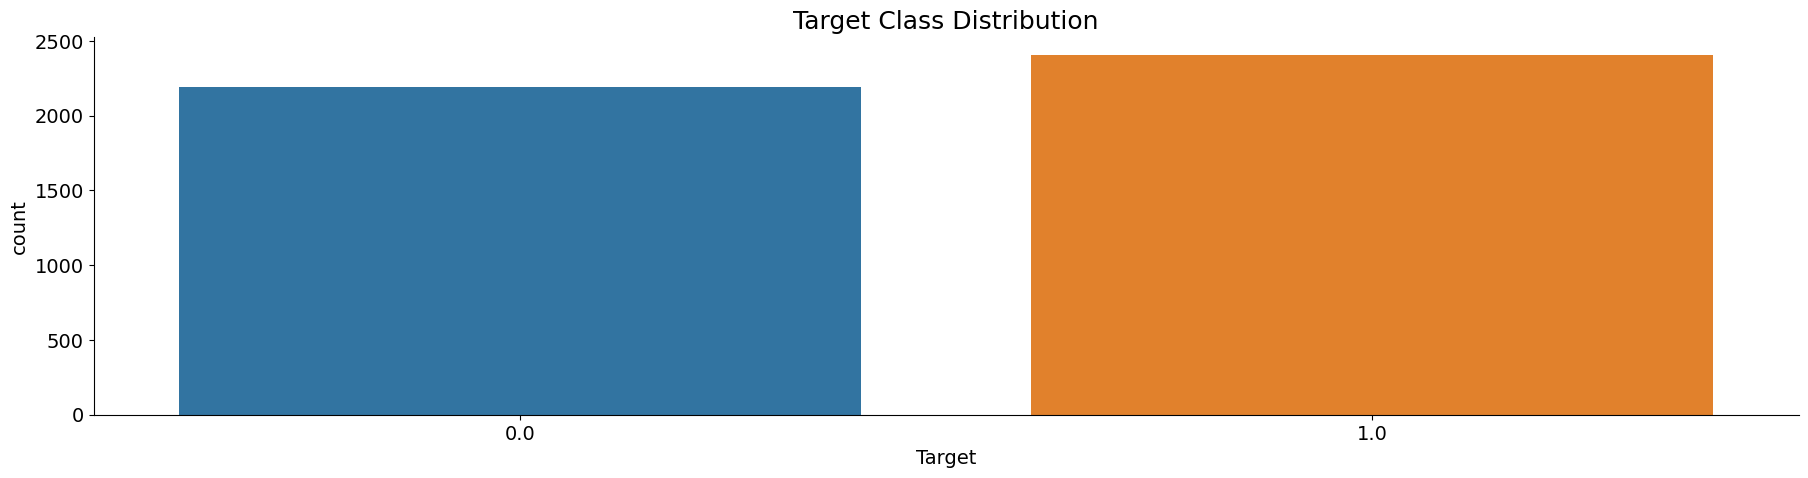

In [12]:
sns.countplot(df['Target'])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel('Target')
plt.title('Target Class Distribution', fontsize=18)
plt.show()

<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color: royalblue;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:white;">Spliiting and Resampling Data, Training Model
    
</h2>
</div>
    
</center>

As we saw earlier that there is a slight imbalance in our classes, we will go ahead and resample the data. We are initializing the `RandomOverSampler` object and then resampling our inputs and the targets.

In [13]:
ros = RandomOverSampler(random_state=0)

In [14]:
X = df[["Open", "High", "Low", "Close", "Volume"]].values
y = df['Target'].values
X_resampled, y_resampled  = ros.fit_resample(X,y)

<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color: ;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:black;">Countplot of Resampled Classes
    
</h2>
</div>
    
</center>

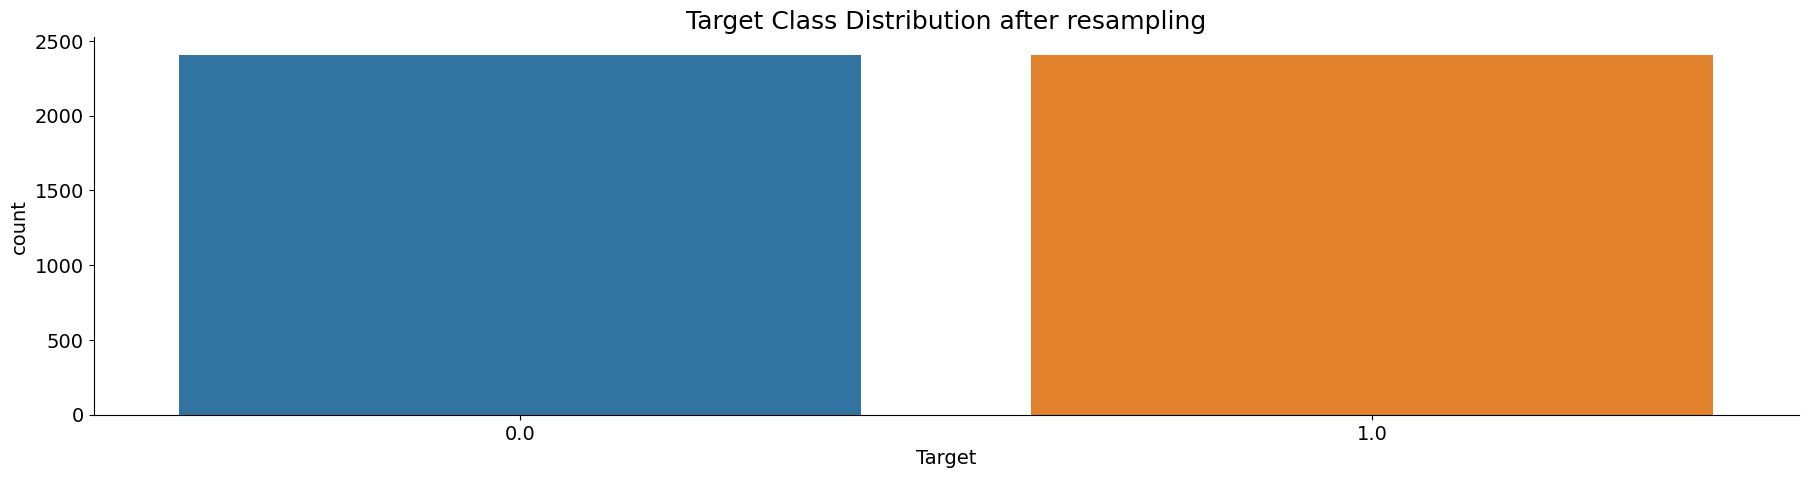

In [15]:
sns.countplot(y_resampled)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel('Target')
plt.title('Target Class Distribution after resampling', fontsize=18)
plt.show()

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42)

<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color: mediumpurple;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:white;">Base Model
    
</h2>
</div>
    
</center>

We are starting off with a base model with the max_depth of 3 and a learning rate of 1 and the rest of parameters are default. 

In the fit method we are using `Early Stopping` which is an approach to training complex machine learning models to avoid overfitting. It works by monitoring the performance of the model that is being trained on a separate test dataset and stopping the training procedure once the performance on the test dataset has not improved after a fixed number of training iterations.

It avoids overfitting by attempting to automatically select the inflection point where performance on the test dataset starts to decrease while performance on the training dataset continues to improve as the model starts to overfit. **XGBoost** supports *early stopping* after a fixed number of iterations. In addition to specifying a metric and test dataset for evaluation each epoch, you must specify a window of the number of epochs over which no improvement is observed. This is specified in the early_stopping_rounds parameter.

Since we want to track the performance of the model on the both training and test set, we have given the model training and test set in the form of tuples and we are tracking the classification error and the logloss passed into the `eval_metric` argument.

In [17]:
model = XGBClassifier(max_depth=3, learning_rate=0.1)
history = model.fit(X_train, y_train, early_stopping_rounds =2, eval_set =[(X_train, y_train), (X_test, y_test)], 
                    eval_metric=["error", "logloss"], verbose=0)
predictions = model.predict(X_test)

In [18]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.55      0.53      0.54       589
         1.0       0.56      0.58      0.57       614

    accuracy                           0.56      1203
   macro avg       0.56      0.56      0.56      1203
weighted avg       0.56      0.56      0.56      1203



Below are the parameters used while training the XGBoost model.

In [19]:
history.get_xgb_params()

{'objective': 'binary:logistic',
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'eval_metric': None,
 'gamma': 0,
 'gpu_id': -1,
 'grow_policy': 'depthwise',
 'interaction_constraints': '',
 'learning_rate': 0.1,
 'max_bin': 256,
 'max_cat_to_onehot': 4,
 'max_delta_step': 0,
 'max_depth': 3,
 'max_leaves': 0,
 'min_child_weight': 1,
 'monotone_constraints': '()',
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'sampling_method': 'uniform',
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

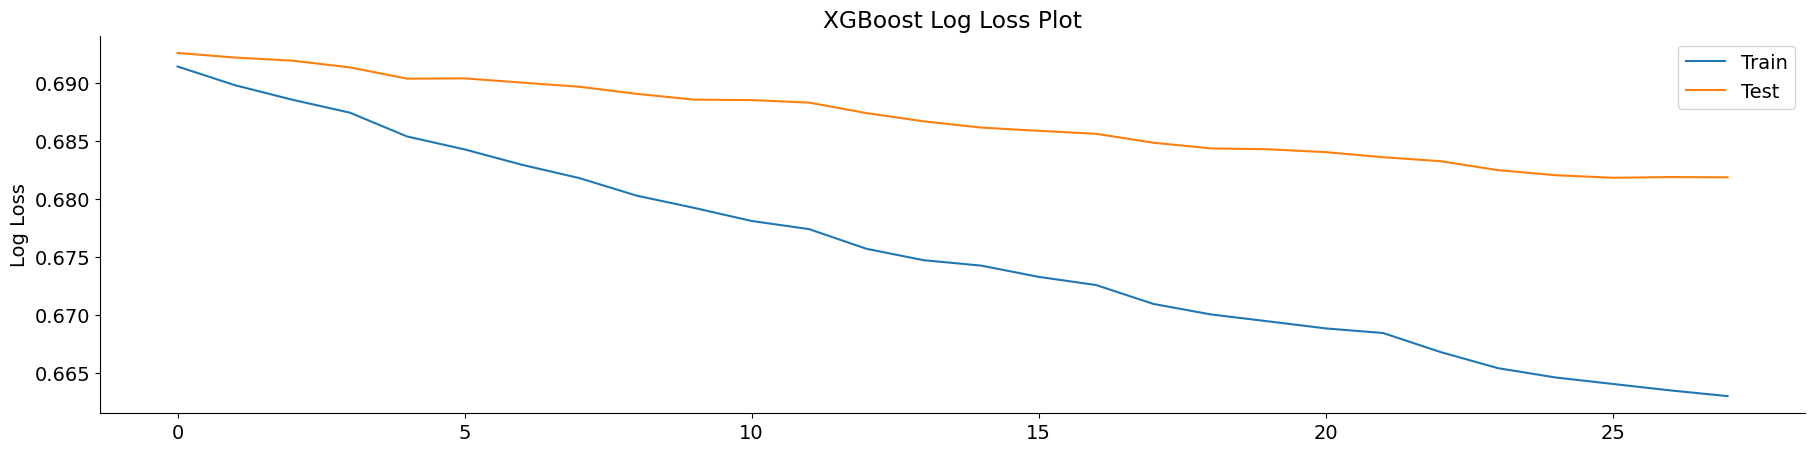

In [20]:
epochs = len(history.evals_result_['validation_0']['error'])
x_axis = range(0, epochs)
fig, ax = plt.subplots()
ax.plot(x_axis, history.evals_result_['validation_0']['logloss'], label='Train')
ax.plot(x_axis, history.evals_result_['validation_1']['logloss'], label='Test')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss Plot')
plt.show()

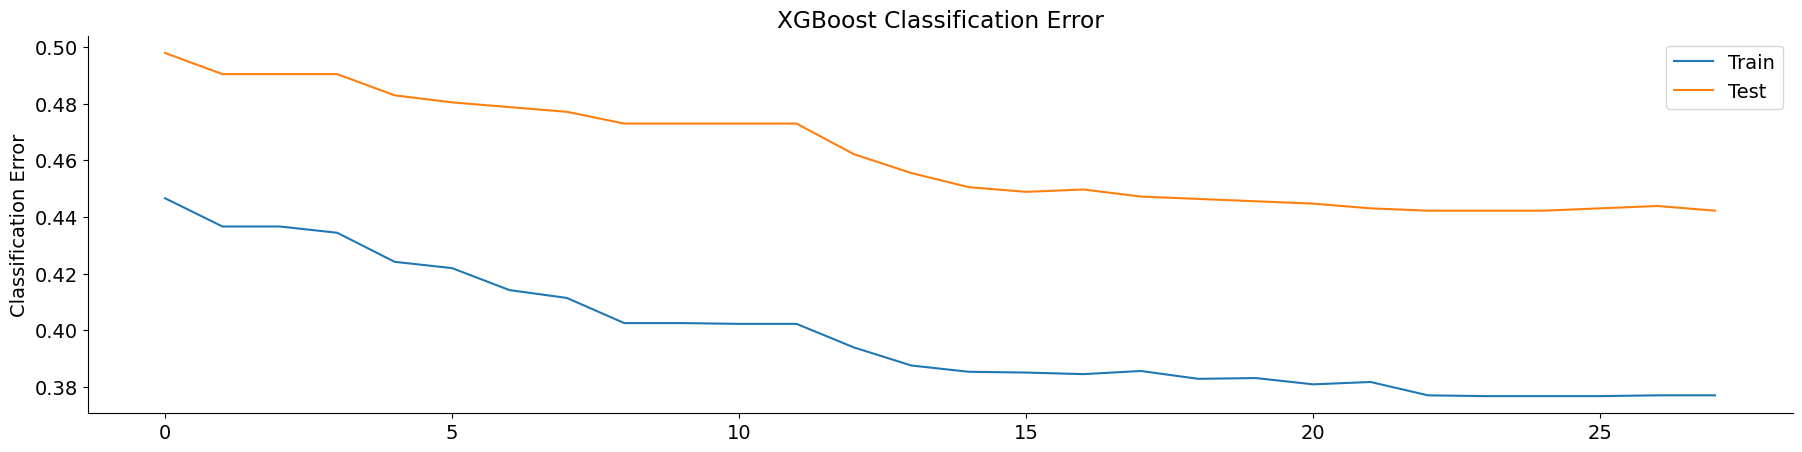

In [21]:
epochs = len(history.evals_result_['validation_0']['error'])
x_axis = range(0, epochs)
fig, ax = plt.subplots()
ax.plot(x_axis, history.evals_result_['validation_0']['error'], label='Train')
ax.plot(x_axis, history.evals_result_['validation_1']['error'], label='Test')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
ax.legend()
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error')
plt.show()

<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color: mediumpurple;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:white;">Increasing Depth and Adding L2 Regularization
    
</h2>
</div>
    
</center>

In [22]:
model = XGBClassifier(max_depth=7, learning_rate=0.1, reg_lambda=0.6)
history = model.fit(X_train, y_train, early_stopping_rounds =2, eval_set =[(X_train, y_train), (X_test, y_test)], 
                    eval_metric=["error", "logloss"], verbose=0)
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.65      0.69      0.67       589
         1.0       0.68      0.65      0.67       614

    accuracy                           0.67      1203
   macro avg       0.67      0.67      0.67      1203
weighted avg       0.67      0.67      0.67      1203



<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color: mediumpurple;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:white;">Increasing Depth even further
    
</h2>
</div>
    
</center>

In [23]:
model = XGBClassifier(max_depth=15, learning_rate=0.1, reg_lambda=0.6)
history = model.fit(X_train, y_train, early_stopping_rounds =2, eval_set =[(X_train, y_train), (X_test, y_test)], verbose=0)
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.71      0.69      0.70       589
         1.0       0.71      0.73      0.72       614

    accuracy                           0.71      1203
   macro avg       0.71      0.71      0.71      1203
weighted avg       0.71      0.71      0.71      1203



<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color: royalblue;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:white;">Hyperparameter tuning using GridSearchCV
    
</h2>
</div>
    
</center>

In [24]:
param_grid = { 'max_depth' : [3,5,7, 10, 12, 15]}

In [25]:
clf = GridSearchCV(model, param_grid= param_grid)
clf.fit(X_resampled, y_resampled)

GridSearchCV(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=0, gpu_id=-1,
                                     grow_policy='depthwise',
                                     importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.1, max_bin=256,
                                     max_cat_to_onehot=4, max_delta_step=0,
                                     max_depth=15, max_leaves=0,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estima

In [26]:
print(f'The best parameters are {clf.best_params_}')

The best parameters are {'max_depth': 15}


In [27]:
print(f'The best model is {clf.best_estimator_}')

The best model is XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=15, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=0.6, ...)


<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color: royalblue;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:white;">Training after hyperparameter tuning
    
</h2>
</div>
    
</center>

In [28]:
model = clf.best_estimator_
history = model.fit(X_train, y_train, early_stopping_rounds =2, eval_set =[(X_train, y_train), (X_test, y_test)], 
                    eval_metric=["error", "logloss"],verbose=0)
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.71      0.69      0.70       589
         1.0       0.71      0.73      0.72       614

    accuracy                           0.71      1203
   macro avg       0.71      0.71      0.71      1203
weighted avg       0.71      0.71      0.71      1203



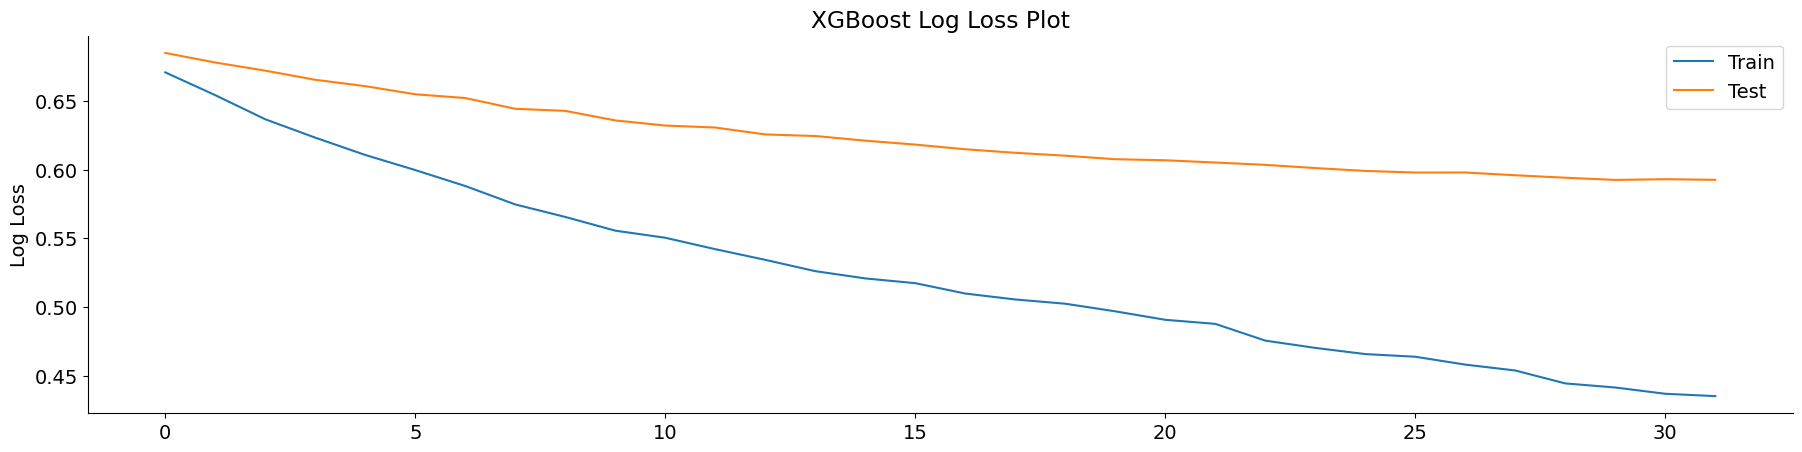

In [29]:
epochs = len(history.evals_result_['validation_0']['error'])
x_axis = range(0, epochs)
fig, ax = plt.subplots()
ax.plot(x_axis, history.evals_result_['validation_0']['logloss'], label='Train')
ax.plot(x_axis, history.evals_result_['validation_1']['logloss'], label='Test')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss Plot')
plt.show()

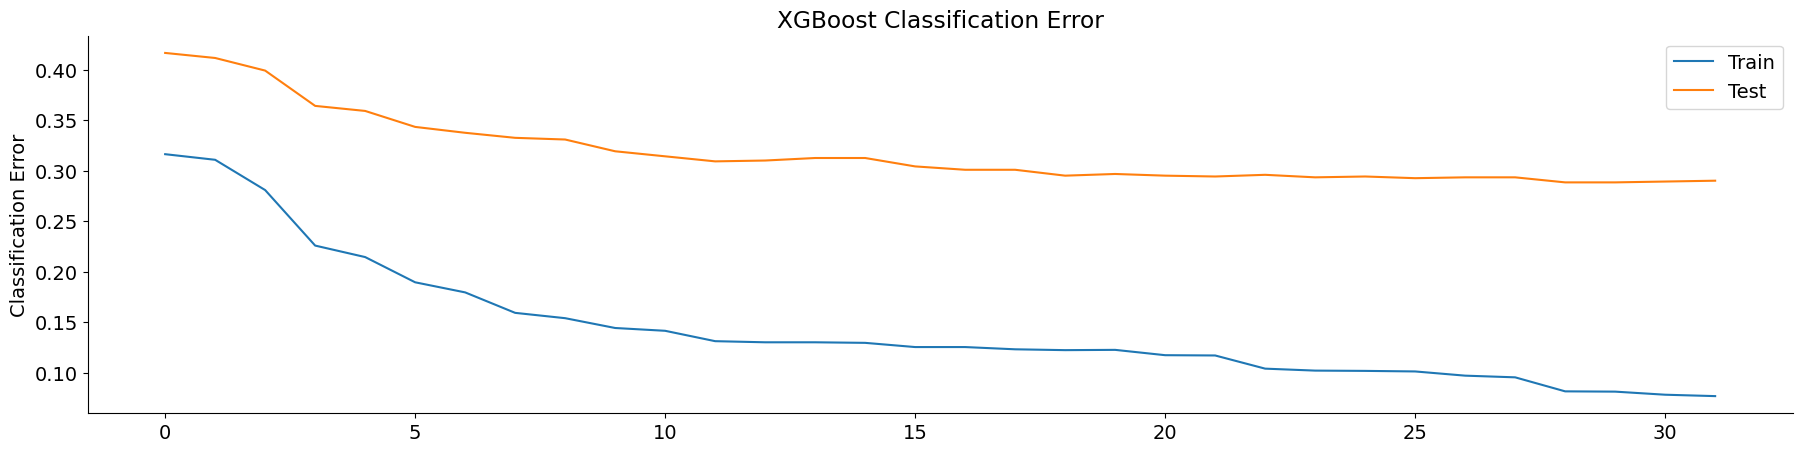

In [30]:
epochs = len(history.evals_result_['validation_0']['error'])
x_axis = range(0, epochs)
fig, ax = plt.subplots()
ax.plot(x_axis, history.evals_result_['validation_0']['error'], label='Train')
ax.plot(x_axis, history.evals_result_['validation_1']['error'], label='Test')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
ax.legend()
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error')
plt.show()

<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color: royalblue;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:white;">Backtesting
    
</h2>
</div>
    
</center>

Backtesting is the general method for seeing how well a strategy or model would have done ex-post. Backtesting assesses the viability of a trading strategy by discovering how it would play out using historical data. If backtesting works, traders and analysts may have the confidence to employ it going forward


<b> Understanding Backtesting</b>

Backtesting allows a trader to simulate a trading strategy using historical data to generate results and analyze risk and profitability before risking any actual capital.

A well-conducted backtest that yields positive results assures traders that the strategy is fundamentally sound and is likely to yield profits when implemented in reality. In contrast, a well-conducted backtest that yields suboptimal results will prompt traders to alter or reject the strategy.

In [31]:
def backtest(data, model, predictors, start=1000, step=50):
    predictions = []
    # Loop over the dataset in increments
    for i in range(start, data.shape[0], step):
        # Split into train and test sets
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        
        # Fit the model
        model.fit(train[predictors], train["Target"])
        
        # Make predictions
        preds = model.predict_proba(test[predictors])[:,1]
        preds = pd.Series(preds, index=test.index)
        preds[preds > .6] = 1
        preds[preds<=.6] = 0
        
        # Combine predictions and test values
        combined = pd.concat({"Target": test["Target"],"Predictions": preds}, axis=1)
        
        predictions.append(combined)
    
    return pd.concat(predictions)

In backtesting, what we are doing is training the model on first 1000 rows and then testing the model on next 50 rows and this is being done for the entire dataset. This will ensure our model learns from each iteration and is able to make better predictions. 

While making predictions we are using something known as `predict_proba` which is basically giving us the probabilities. The model usually has 0.5 as the threshold for classifying the data points but we are taking it a step further to 0.6 and then returning those predictions.

In [32]:
%%time
backtestpredictions = backtest(df, model, predictors)

CPU times: user 1min 47s, sys: 2.15 s, total: 1min 49s
Wall time: 57.2 s


In [33]:
backtestpredictions

,Target,Predictions
Date,,
2008-08-12 00:00:00-04:00,1.0,1.0
2008-08-13 00:00:00-04:00,1.0,0.0
2008-08-14 00:00:00-04:00,0.0,0.0
2008-08-15 00:00:00-04:00,1.0,1.0
2008-08-18 00:00:00-04:00,1.0,1.0
...,...,...
2022-11-16 00:00:00-05:00,1.0,1.0
2022-11-17 00:00:00-05:00,1.0,1.0
2022-11-18 00:00:00-05:00,0.0,1.0


In [34]:
print('Precision Score before adding predictors',
      round(precision_score(backtestpredictions['Target'], backtestpredictions['Predictions'])*100,2))

Precision Score before adding predictors 67.61


<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color: royalblue;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:white;">Adding More Predictors to get better precision
    
</h2>
</div>
    
</center>

One of the ways you can increase model performance is feature engineering and that's exactly what we are going to do. In the below code cell, we are adding weekly average, quarterly average, yearly average. 

We are also finding if the weekly trend of our target meaning what was the trend of the price during the week. We are also adding bunch of percentages i.e open-close ratio, annual quarterly mean etc. that would give the model more information about the data and the trend.

Read more [here](https://www.simplilearn.com/tutorials/machine-learning-tutorial/feature-selection-in-machine-learning) on feature selection

In [35]:
weekly_mean = df.rolling(7).mean()
quarterly_mean = df.rolling(90).mean()
annual_mean = df.rolling(365).mean()
weekly_trend = df.shift(1).rolling(7).mean()["Target"]
df["weekly_mean"] = weekly_mean["Close"] / df["Close"]
df["quarterly_mean"] = quarterly_mean["Close"] / df["Close"]
df["annual_mean"] = annual_mean["Close"] / df["Close"]

df["annual_weekly_mean"] = df["annual_mean"] / df["weekly_mean"]
df["annual_quarterly_mean"] = df["annual_mean"] / df["quarterly_mean"]
df["weekly_trend"] = weekly_trend

df["open_close_ratio"] = df["Open"] / df["Close"]
df["high_close_ratio"] = df["High"] / df["Close"]
df["low_close_ratio"] = df["Low"] / df["Close"]

In [36]:
df

,Open,High,Low,Close,Volume,Target,weekly_mean,quarterly_mean,annual_mean,annual_weekly_mean,annual_quarterly_mean,weekly_trend,open_close_ratio,high_close_ratio,low_close_ratio
Date,,,,,,,,,,,,,,,
2004-08-23 00:00:00-04:00,2.527778,2.729730,2.515015,2.710460,456686856.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.932601,1.007109,0.927892
2004-08-24 00:00:00-04:00,2.771522,2.839840,2.728979,2.737738,365122512.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.012340,1.037294,0.996801
2004-08-25 00:00:00-04:00,2.783784,2.792793,2.591842,2.624374,304946748.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.060742,1.064175,0.987604
2004-08-26 00:00:00-04:00,2.626627,2.702703,2.599600,2.652653,183772044.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.990189,1.018868,0.980000
2004-08-27 00:00:00-04:00,2.626376,2.701451,2.619119,2.700450,141897960.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.972570,1.000371,0.969882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-16 00:00:00-05:00,98.260002,100.139999,96.709999,98.440002,41640800.0,1.0,0.942126,1.069982,1.277054,1.355502,1.193529,0.714286,0.998171,1.017269,0.982426
2022-11-17 00:00:00-05:00,97.900002,99.639999,97.639999,98.849998,29105200.0,1.0,0.953190,1.063838,1.271173,1.333598,1.194893,0.714286,0.990390,1.007992,0.987759
2022-11-18 00:00:00-05:00,96.970001,99.279999,96.790001,98.360001,26052600.0,0.0,0.971678,1.067670,1.276892,1.314109,1.195961,0.714286,0.985868,1.009353,0.984038


<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color: royalblue;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:white;">Imputing Null Values
    
</h2>
</div>
    
</center>

Imputing Null values is the process of filling the missing values. Although XGBoost is capable enough of handling missing values, many algorithms might not have such in-built capability. As a general guideline, it's always good to impute the null values. 

Here we are imputing null values because of the backtesting we did earlier. For some of the rows there were no previous data available given the time frame (weekly, annually etc) hence there are some `NaN` values which we will treat by filling the values as 0. This may not be the best strategy but this is the one we are going with.

In [37]:
df.isnull().sum()

Open                       0
High                       0
Low                        0
Close                      0
Volume                     0
Target                     0
weekly_mean                6
quarterly_mean            89
annual_mean              364
annual_weekly_mean       364
annual_quarterly_mean    364
weekly_trend               7
open_close_ratio           0
high_close_ratio           0
low_close_ratio            0
dtype: int64

In [38]:
for i in range(len(df.columns)):
    if df[df.columns[i]].isnull().sum()>0:
        df[df.columns[i]].fillna(0, axis=0, inplace=True)
    else:
        continue
df.isna().sum()

Open                     0
High                     0
Low                      0
Close                    0
Volume                   0
Target                   0
weekly_mean              0
quarterly_mean           0
annual_mean              0
annual_weekly_mean       0
annual_quarterly_mean    0
weekly_trend             0
open_close_ratio         0
high_close_ratio         0
low_close_ratio          0
dtype: int64

<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color: royalblue;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:white;">Backtesting with new predictors
    
</h2>
</div>
    
</center>

In [39]:
predictors  = ['Open', 'High','Low','Close','Volume','weekly_mean','quarterly_mean','annual_mean',
 'annual_weekly_mean','annual_quarterly_mean','weekly_trend','open_close_ratio','high_close_ratio','low_close_ratio']

In [40]:
%%time
backtestpredictions = backtest(df, model, predictors)

CPU times: user 2min 44s, sys: 3.21 s, total: 2min 48s
Wall time: 1min 27s


In [41]:
print('Precision Score after adding predictors',
      round(precision_score(backtestpredictions['Target'], backtestpredictions['Predictions'])*100,2))

Precision Score after adding predictors 85.22


In [42]:
print(classification_report(backtestpredictions['Target'], backtestpredictions['Predictions']))

              precision    recall  f1-score   support

         0.0       0.80      0.84      0.82      1710
         1.0       0.85      0.81      0.83      1887

    accuracy                           0.83      3597
   macro avg       0.83      0.83      0.83      3597
weighted avg       0.83      0.83      0.83      3597




<center>
<div class="alert alert-block alert-success">  
<b>SUCCESS:</b> By adding more predictors, we have been able to get to a better percentage of precision.
</div>
</center>

<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color: royalblue;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:white;">Resources
    
</h2>
</div>
    
</center>

- https://www.youtube.com/watch?v=SYrFhugaoZk